In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Original Round 1 Data.csv")
R1_Result_df = pd.read_csv("Round 1 Results.csv")
R2_Pred_df = pd.read_csv("Round 2 Need to Predict.csv")

#dfb = pd.read_excel("Round 1 Data FCRR.xlsx")
df.head()
df['Date'] = pd.to_datetime(df['Date'],format="%d/%m/%Y")
R1_Result_df['Date'] = pd.to_datetime(R1_Result_df['Date'],format="%d/%m/%Y")
R2_Pred_df['Date'] = pd.to_datetime(R2_Pred_df['Date'],format="%d/%m/%Y")

In [15]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

regr = linear_model.LinearRegression()
#regr = linear_model.Ridge (alpha = 1)
#regr = linear_model.Lasso(alpha = 10)
#regr = linear_model.ElasticNet(alpha = 0.1,max_iter=1000)
#regr = linear_model.Lars()
#regr = linear_model.LarsLasso()
#regr=linear_model.OrthogonalMatchingPursuit() 
#regr=linear_model.BayesianRidge()
#regr=linear_model.SGDRegressor()
#regr=linear_model.PassiveAggressiveRegressor(max_iter=1000) 
#regr=linear_model.TheilSenRegressor()
#regr=linear_model.HuberRegressor()

#regr=ensemble.RandomForestRegressor(n_estimators=1000,max_features=10)

#regr=MLPRegressor(hidden_layer_sizes=(6,), random_state=1, max_iter=10000, solver='lbfgs', learning_rate_init=0.0001,alpha=1e-10,batch_size=1)

from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred): 

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)
    y_true=np.array(y_true)
    y_pred = np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def ConstrainResults(resultsD):
    resultsD=np.array(resultsD)
    output=[]
    output = np.clip(resultsD,200,1500)
    
    return output

def ParseDF(df):
    X=[]
    
    for index,i in df.iterrows():
        if index>732:
            pass
        l = []
        
        l.append(i["Temp"])
        l.append(i["Wind_Speed"])
        l.append(i["Precip_Amount"])
        l.append(i["Chill"])
        l.append(i["Solar_Rad"])
        l.append(i["Humidity"])
        l.append(i["Cloud_Cover"])
        #l.append(i["Date"].month)
        #l.append(i["Date"].day)
        l2=[]
        for k in l:
            for j in range(1,5):
                l2.append(k**j)

        X.append(l2)
    return X


Xa=ParseDF(df)
Xb=ParseDF(R1_Result_df)
X=Xa+Xb
Ya = [float(x) for x in df["Demand"]]
Yb = [float(x) for x in R1_Result_df["Demand"]]
Y=Ya+Yb

#Remove the last 55 points from the traingin set
X_train=X[:-55]
Y_train=Y[:-55]

X_train=X
Y_train=Y

X_R2_Pred = ParseDF(R2_Pred_df)
X_valid = X_R2_Pred
Y_result =  [500 for x in X_R2_Pred]




In [16]:
scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

In [17]:
#regr.normalize = True

#XTR=PolynomialFeatures(interaction_only=True).fit_transform(X_train)
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
#regr.coef_


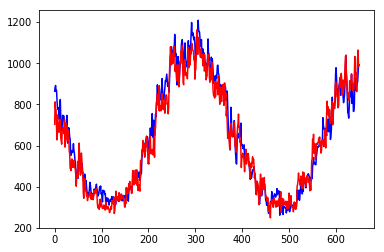

In [19]:
#Block of code to graph predictions


result =regr.predict(X_train)

#for i in X:
#    print(i)
#    result.append(regr.predict(i))
ran= 650
rang = np.arange(ran)


plt.figure(1)
plt.clf()
plt.plot(rang,Y[0:ran],'b')

plt.plot(rang,result[0:ran],'r')
plt.show()


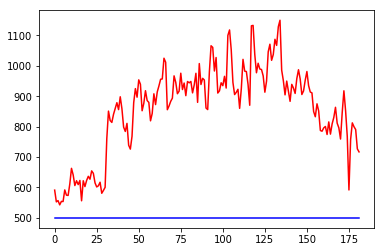

In [20]:
plt.figure(2)
Model_Result = regr.predict(X_valid)
Model_Result =ConstrainResults(Model_Result)
ran= len(X_valid)
rang = np.arange(ran)


plt.clf()
plt.plot(rang,Y_result,'b')

plt.plot(rang,Model_Result,'r')
plt.show()
for i in Model_Result:
    if i<20:
        print(i)

In [21]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(Y_result,Model_Result)
mape = mean_absolute_percentage_error(Y_result,Model_Result)
print(mse)
print(mape)

149145.606605
71.6058881516


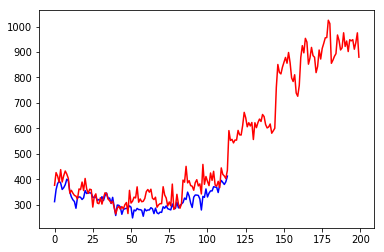

In [22]:
#Block of code to graph predictions


result = list(result) + list(Model_Result)

#for i in X:
#    print(i)
#    result.append(regr.predict(i))
ran= 650
rang = np.arange(ran)


plt.figure(3)
plt.clf()
plt.plot(Y[800:1000],'b')

plt.plot(result[800:1000],'r')
plt.show()


In [23]:
for i in Model_Result:
    print(i)

591.264519565
552.624438311
556.911598485
542.917727475
554.295001357
553.795141943
591.97853999
574.73114368
573.868775949
611.542102727
662.884619588
641.466546206
606.298599955
622.191822557
609.556381214
623.076097233
556.282248569
622.087922293
602.901279851
623.056368945
636.644331805
627.159205302
654.538639789
646.469487958
615.085356461
601.756829454
605.55223786
617.227708027
580.940390279
590.274948459
600.518592899
760.555521293
850.889802535
820.003834183
813.763951226
840.374902004
860.064721239
878.543062267
855.855407053
897.977827002
858.458456304
798.384070756
784.084834217
810.581770829
738.863696818
726.077376605
768.182274585
878.682381711
924.825982362
896.664551808
953.566446991
938.991834099
852.084072876
876.228378511
917.938648901
885.684438807
879.352122028
818.988786648
843.189392374
907.765545346
872.351086663
913.84043321
933.617015088
955.511240951
956.677286155
1024.64990761
1011.49707903
855.514838475
867.686878996
882.888427343
893.476893751
966.712708

In [24]:
dfg = pd.read_csv('Round 2 Results.csv')
li = list(dfg["Demand"])
mse = metrics.mean_squared_error(Y_result,Model_Result)
mape = mean_absolute_percentage_error(li,Model_Result)
print(mse)
print(mape)

149145.606605
14.6294673428
